In [1]:
from geomdl import NURBS
from geomdl import BSpline
from geomdl.visualization import VisMPL
from geomdl import multi
import numpy as np
from matplotlib import cm
from clifford.tools.g3c import *
from clifford.tools.g3c.rotor_parameterisation import *
from pyganja import *

Failed to import cef_gui, cef functions will be unavailable


In [2]:
def list_to_CGA(x):
    c = + x[0]*e1 + x[1]*e2 - x[2]*e3
    return up(c)

x = np.linspace(0,1,101)
Bc0 = np.around((1-x)**3,8)
Bc1 = np.around(3*x*(1-x)**2,8)
Bc2 = np.around(3*x**2*(1-x),8)
Bc3 = np.around(x**3,8)

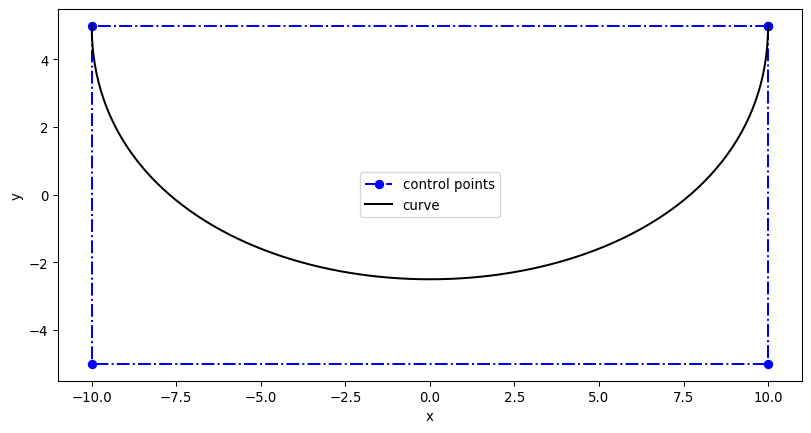

In [6]:
crv = NURBS.Curve()
crv.degree = 3
crv.ctrlptsw = [[10, 5, 0, 1], [-10, 5, 0, 1], [-10, -5, 0, 1], [10, -5, 0, 1], [10, 5, 0, 1]]
crv.knotvector = [0, 0, 0, 0, 0, 1, 1, 1, 1]

crv.vis = VisMPL.VisCurve2D()
crv.render()

NURBS_points = [list_to_CGA(crv.evalpts[i]) for i,j in enumerate(crv.evalpts)]
NURBS_pp_list = [NURBS_points[i]^NURBS_points[i+1] for i in range(len(crv.evalpts)-1)]


In [72]:
X1 = up(-10*e1 + 5*e2)
Sp1 = (X1 - 0.5*einf)*I5
Pl1 = (0*e2 + 1*e1 -10*einf)*I5
Ci1 = meet(Sp1,Pl1)



X2 = up(-10*e1 - 5*e2)
Sp2 = (X2 - 0.5*3**2*einf)*I5
Pl2 = (1*e1 - 0*e2 - 10*einf)*I5
Ci2 = meet(Sp2,Pl2)

X3 = up(10*e1 - 5*e2)
Sp3 = (X3 - 0.5*3**2*einf)*I5
Pl3 = (1*e1 + 0*e2 + 10*einf)*I5
Ci3 = meet(Sp3,Pl3)

X4 = up(10*e1 + 5*e2)
Sp4 = (X4 - 0.5*einf)*I5
Pl4 = (+ 0*e2 + 1*e1 +10*einf)*I5
Ci4 = meet(Sp4,Pl4)

circle_list = [average_objects([Ci1,Ci2,Ci3,Ci4], [Bc0[i],Bc1[i],Bc2[i], Bc3[i]]) for i in range(101)]


centre_list = [normalise_n_minus_1((C*einf*C)(1)) for C in circle_list]

centre_pp_list = [centre_list[i]^centre_list[i+1] for i in range(100)]

In [64]:
X1_alt = up(-10*e1 + 5*e2)
Sp1_alt = (X1_alt - 0.5*einf)*I5
Pl1_alt = (-e2 -5*einf)*I5
Ci1_alt = meet(Sp1_alt,Pl1_alt)

X2_alt = up(-10*e1 - 5*e2)
Sp2_alt = (X2_alt - 0.5*einf)*I5
Pl2_alt = (0.707*e1 - 0.707*e2 - 3.56*einf)*I5
Ci2_alt = meet(Sp2_alt,Pl2_alt)

X3_alt = up(10*e1 - 5*e2)
Sp3_alt = (X3 - 0.5*einf)*I5
Pl3_alt = (0.707*e1 + 0.707*e2 + 3.56*einf)*I5
Ci3_alt = meet(Sp3_alt,Pl3_alt)

X4_alt = up(10*e1 + 5*e2)
Sp4_alt = (X4_alt - 0.5*einf)*I5
Pl4_alt = (+e2 +5*einf)*I5
Ci4_alt = meet(Sp4_alt,Pl4_alt)

circle_list_alt = [average_objects([Ci1_alt,Ci2_alt,Ci3_alt,Ci4_alt], [Bc0[i],Bc1[i],Bc2[i], Bc3[i]]) for i in range(101)]


centre_list_alt = [normalise_n_minus_1((C*einf*C)(1)) for C in circle_list_alt]

centre_pp_list_alt = [centre_list_alt[i]^centre_list_alt[i+1] for i in range(100)]

In [75]:
sc = GanjaScene()
sc.add_objects([o(2).normal().clean(1E-4) for o in NURBS_pp_list], color.Color.RED)
sc.add_objects([o(2).normal().clean(1E-4) for o in centre_pp_list], color.Color.BLACK)
sc.add_objects([Ci1,Ci2,Ci3,Ci4], color.Color.BLACK)
sc.add_objects([o(3).normal().clean(1E-4) for o in circle_list], color.Color.RED)
sc.add_objects([o(2).normal().clean(1E-4) for o in centre_pp_list_alt], color.Color.BLUE)
sc.add_objects([Ci1_alt,Ci2_alt,Ci3_alt,Ci4_alt], color.Color.BLUE)
#sc.add_objects([o(3).normal().clean(1E-4) for o in circle_list], color.Color.BLACK)
draw(sc, 
    static=False, 
    scale=0.1)

<IPython.core.display.Javascript object>